# Predicting Car Prices

We'll do some very basic k-nearest neighbours analysis to predict car prices based on its attributes. 

The dataset I'm going to use comes from here: https://archive.ics.uci.edu/ml/datasets/automobile

These data contain a ton of information on a lot of different cars. For example, make, model, fuel type, body style, drive style, wheel base, engine type, etc.

In [1]:
import pandas as pd

# Need to specify the headers for this dataset
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
       "num_doors", "body_style", "drive_wheels", "engine_location",
       "wheel_base", "length", "width", "height", "curb_weight", "engine_type",
       "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
       "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg",
       "price"]
cars = pd.read_csv("imports-85.data", names=cols)
cars.dtypes


symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [2]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Looking at just the numeric columns, it seems like we can use wheelbase, length, width, height, engine size, compression ratio, and city/highway mpr to predict price.

We're probably going to want to use some of the other variables though, like horsepower, body style, etc. So, right now we'll deal with counting and seeing where our missing values are, as well as turning relevant columns numeric.

In [3]:
import numpy as np

cars = cars.replace('?', np.nan)

# Now lets make things numeric
num_vars = ['normalized_losses', "bore", "stroke", "horsepower", "peak_rpm",
            "price"]

for i in num_vars:
    cars[i] = cars[i].astype('float64')

In [4]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Everything looks good - how many missing values do we have in the normalized losses column?

In [5]:
print("normalized losses: ", cars['normalized_losses'].isnull().sum())

normalized losses:  41


There are 41 missing values in the normalized_losses column. Given there are only 205 rows, thats a decent chunk missing. I'm not sure this column is the most useful, so we'll just not use this column in our analyses at all. Let's take a look at our other numeric columns and see what the missing values are like.

In [6]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

So it looks like most of our columns are pretty good, with only a couple missing  values here and there. The most crucial one here is price, our outcome variable. Given that the number of missing rows is, at most, about 2%, I'm just going to listwise delete any row that has a missing variable in any of these. I don't like mean imputation as it is purely making up data.

I'll start with the price column because its the most important and I suspect the rows that are missing price are the same rows missing the other data as well.

In [7]:
cars = cars.dropna(subset = ['price'])

Now lets check the missing values again:

In [8]:
cars.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Now, I'll do the same to listwise delete the other numeric columns.

In [9]:
cars = cars.dropna(subset = ['bore', 'stroke', 'horsepower', 'peak_rpm'])

Now, we should have no missing data and be ready to go! The next step is to convert all the numeric columns into standardized z-scores. I'm going to take the dataset down to only the numeric columns because thats all we care about here, then standardize everything.

In [10]:
cols = ['wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars[cols]

normalized_cars = (cars - cars.mean()) / (cars.std())

Alright, onward into some modeling! First we're just going to build some basic univariate models testing some different predictors.

In [11]:
# Writing a simple function that trains and tests univariate models
# This function takes in three arguments: the predictor, the outcome, & the data
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

# Lets test a couple of predictors
print('city mpg: ', knn_train_test('city_mpg', 'price', normalized_cars))
print('width: ', knn_train_test('width', 'price', normalized_cars))
print('highway mpg: ', knn_train_test('highway_mpg', 'price', normalized_cars))
print('engine size: ', knn_train_test('engine_size', 'price', normalized_cars))
print('horsepower: ', knn_train_test('horsepower', 'price', normalized_cars))

city mpg:  0.598975486019
width:  0.671608148246
highway mpg:  0.537913994132
engine size:  0.536691465842
horsepower:  0.571585852136


There are a couple of rmse values for some univariate models. I threw in "width" as a logic check - why would width predict the price of a car, unless larger vehicles are more expensive. In any case, it should be the worst predictor and it is. Of the couple that I threw in there to test, the best predictor of a vehicles price seems to be it's highway mpg.

Now, as a test, I'm going to modify the above function to take another argument: a k value. Then, I'll test each of the five predictors above with five different values of k (1, 3, 5, 7, and 9).

In [13]:
def knn_train_test_new(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column from above, train a model, return RMSE value
# and add to the dictionary `rmse_results`.
variables = ['wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg']

for var in variables:
    rmse_val = knn_train_test_new(var, 'price', normalized_cars)
    k_rmse_results[var] = rmse_val

k_rmse_results

{'bore': {1: 1.2142304178718561,
  3: 0.86766581048215152,
  5: 0.89458788943880752,
  7: 0.94676716177240661,
  9: 0.95385344053196963},
 'city_mpg': {1: 0.69529747854104784,
  3: 0.59031417913396289,
  5: 0.59897548601904338,
  7: 0.59715938629269016,
  9: 0.57728649652220132},
 'curb_weight': {1: 0.8365387787670262,
  3: 0.64395375801733934,
  5: 0.57031290606074236,
  7: 0.51644149986604171,
  9: 0.51839468763038343},
 'engine_size': {1: 0.55456842477058543,
  3: 0.54125650939355474,
  5: 0.53669146584152094,
  7: 0.51899873944760311,
  9: 0.50362821678292591},
 'height': {1: 1.1521894508998922,
  3: 1.0168354498989998,
  5: 0.94018342361170537,
  7: 0.98192402693779424,
  9: 0.94562106614391528},
 'highway_mpg': {1: 0.69402405950428248,
  3: 0.57416390399142236,
  5: 0.53791399413219376,
  7: 0.53495996840130122,
  9: 0.54899088943686292},
 'horsepower': {1: 0.54931712010379319,
  3: 0.58337889657418729,
  5: 0.57158585213578872,
  7: 0.59314672824644243,
  9: 0.59002690698940097}

Generally speaking, going up to k = 9 worked the best for some of the models, but not for others. The error actually went up as we increased k for some. With a k of 9, the best univariate predictor seems to be engine size, with predictions only off by about half a standard deviation. So thats the best, but it's still not great.

Now, I'll modify the above function to take multiple columns and then train and test some models using the the best two, then three, four, and five columns from above.

In [25]:
def knn_train_test_mult(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

train_cols_2 = ['engine_size', 'highway_mpg']
train_cols_3 = ['engine_size', 'highway_mpg', 'curb_weight']
train_cols_4 = ['engine_size', 'highway_mpg', 'curb_weight',
               'horsepower']
train_cols_5 = ['engine_size', 'highway_mpg', 'curb_weight',
               'horsepower', 'city_mpg']

k_rmse_results = {}

rmse_val = knn_train_test_mult(train_cols_2, 'price', normalized_cars)
k_rmse_results["two best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_3, 'price', normalized_cars)
k_rmse_results["three best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_4, 'price', normalized_cars)
k_rmse_results["four best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_5, 'price', normalized_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {5: 0.49634970383078636},
 'four best features': {5: 0.48157162981314988},
 'three best features': {5: 0.50707231602531166},
 'two best features': {5: 0.43695579560820619}}

Interestingly, adding more predictors does not increase the performance of the model at all. This is not at all surprising because we started with the two best predictors, and just tacked on worse and worse predictors. So simply adding more doesn't do anything good for us, it just adds more muddy predictors to the model.

The best performing model here to predict the price of a car is simply it's engine size and highway miles per gallon.

In [35]:
def knn_train_test_mult(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = list(range(1,25))
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results_2 = {}

rmse_val = knn_train_test_mult(train_cols_2, 'price', normalized_cars)
k_rmse_results_2["two best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_3, 'price', normalized_cars)
k_rmse_results_2["three best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_4, 'price', normalized_cars)
k_rmse_results_2["four best features"] = rmse_val
rmse_val = knn_train_test_mult(train_cols_5, 'price', normalized_cars)
k_rmse_results_2["five best features"] = rmse_val

k_rmse_results_2


{'five best features': {1: 0.48370851070283638,
  2: 0.45709593736092696,
  3: 0.45932846135166017,
  4: 0.47702516372024495,
  5: 0.49634970383078636,
  6: 0.51326367838750764,
  7: 0.49909158266517145,
  8: 0.49234720868686166,
  9: 0.49925986215124729,
  10: 0.50320132862625788,
  11: 0.49352187011331128,
  12: 0.50969596379759741,
  13: 0.51666729281793589,
  14: 0.52430330537451841,
  15: 0.52831175797337293,
  16: 0.53372729477563852,
  17: 0.53629514907736431,
  18: 0.53771760713738892,
  19: 0.54366780131360726,
  20: 0.55390626006954025,
  21: 0.56186625263562961,
  22: 0.56399228907515964,
  23: 0.56686293421110434,
  24: 0.56749133395228601},
 'four best features': {1: 0.46011695087263338,
  2: 0.47254209382853879,
  3: 0.4957675847479055,
  4: 0.47457606714743178,
  5: 0.48157162981314988,
  6: 0.4988487989184765,
  7: 0.51321993316267744,
  8: 0.51485477394479984,
  9: 0.51767653423898286,
  10: 0.5323478616627898,
  11: 0.51621784291210482,
  12: 0.51180481420952084,
  13

Here is some hyperparamaterization, let's visualize and see if we can see what k-value is the best for each set of predictors.

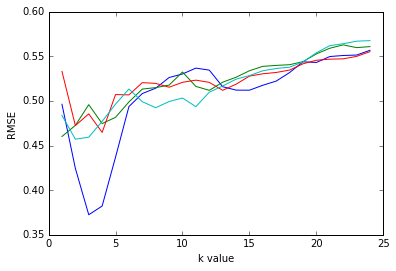

In [37]:
import matplotlib.pyplot as plt
% matplotlib inline

for k,v in k_rmse_results_2.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.show()

The pattern you can discern just looking at the numbers becomes clear here when looking at the graph. The best models for any given set of predictors is right around a k of 3-5. Once we start adding more than that, the performance of the model gets worse.

So, it's again clear the best multivariate k nearest neighbours model to predict the price of a car is using simply highway miles per gallon and engine size, with 3 nearest neighbours.